<a href="https://colab.research.google.com/github/dkumar-23/Masters_ML/blob/main/DNN_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** DIPESH KUMAR

**Student ID:** 2025ab05034

**Date:** 1st Dec, 2025

---

## ⚠️ IMPORTANT INSTRUCTIONS

1. **Complete ALL sections** marked with `TODO`
2. **DO NOT modify** the `get_assignment_results()` function structure
3. **Fill in all values accurately** - these will be auto-verified
4. **After submission**, you'll receive a verification quiz based on YOUR results
5. **Run all cells** before submitting (Kernel → Restart & Run All)

---

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')


✓ Libraries imported successfully


In [2]:
import subprocess
import sys

try:
    from ucimlrepo import fetch_ucirepo
    print("ucimlrepo is already installed.")
except ImportError:
    print("ucimlrepo not found. Attempting to install...")
    try:
        # Use subprocess to run pip install
        subprocess.check_call([sys.executable, "-m", "pip", "install", "ucimlrepo"])
        from ucimlrepo import fetch_ucirepo
        print("ucimlrepo installed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Failed to install ucimlrepo: {e}")
    except ImportError:
        print("Failed to import ucimlrepo even after attempted installation.")

ucimlrepo not found. Attempting to install...
ucimlrepo installed successfully.


## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

In [3]:
# TODO: Load your dataset
#data = pd.read_csv('/content/Cancer_Data.csv')

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
data= breast_cancer_wisconsin_diagnostic.data.original

# metadata
#print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
#print(breast_cancer_wisconsin_diagnostic.variables)
print(data.shape)
data.head()

(569, 32)


,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
# Dataset information (TODO: Fill these)
dataset_name = "Breast Cancer Data Set"  #Breast Cancer Data Set
dataset_source = "https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic"
n_samples = 569      # Total number of rows
n_features = 30    # Number of features (excluding target i.e. 'diagnosis')
problem_type = "binary_classification"

# Problem statement (TODO: Write 2-3 sentences)
problem_statement = """
TODO: Predicting tumor malignancy from diagnostic measurements.
This is critical for early cancer detection in medical diagnosis, enabling timely intervention and improving patient outcomes.'"
"""

# Primary evaluation metric (TODO: Fill this)
primary_metric = "recall"

# Metric justification (TODO: Write 2-3 sentences)
metric_justification = """
TODO: I chose recall because in medical diagnosis, false negatives (missing cancer) are more costly than false positives,
which is crucial for early detection and timely intervention."
"""

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: Breast Cancer Data Set
Source: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
Samples: 569, Features: 30
Problem Type: binary_classification
Primary Metric: recall


## Section 2: Data Preprocessing

Preprocess your data:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

In [5]:
# TODO: Preprocess your data
data = data.drop(columns=['id','Id','ID', 'Unnamed: 32'], errors='ignore')
X = data.drop(['diagnosis','Diagnosis'], axis=1, errors='ignore')
y = data['Diagnosis'].map({'M': 1, 'B': 0})

print("Features (X) and target (y) separated and target encoded.")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

missing_values = X.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values found in the feature DataFrame (X).")
else:
    print("Missing values in feature DataFrame (X) per column:")
    print(missing_values[missing_values > 0])

# TODO: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fill these after preprocessing
train_samples = X_train_scaled.shape[0]       # Number of training samples
test_samples = X_test_scaled.shape[0]        # Number of test samples
train_test_ratio = train_samples / (train_samples + test_samples) # e.g., 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

Features (X) and target (y) separated and target encoded.
X shape: (569, 30)
y shape: (569,)
No missing values found in the feature DataFrame (X).
Train samples: 455
Test samples: 114
Split ratio: 80.0%
X_train_scaled shape: (455, 30)
X_test_scaled shape: (114, 30)


## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [6]:
class BaselineModel:
    """
    Baseline linear model with gradient descent (Logistic Regression for binary classification)
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def fit(self, X, y):
        """
        Implement gradient descent training for Logistic Regression

        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history

        Must populate self.loss_history with loss at each iteration!
        """
        n_samples, n_features = X.shape

        # 1. Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = [] # Reset loss history for new fit

        # 2. Implement gradient descent loop
        for i in range(self.n_iterations):
            # a. Compute predictions (forward pass)
            linear_model = X @ self.weights + self.bias
            y_predicted = self.sigmoid(linear_model)

            # b. Compute loss (Binary Cross-Entropy)
            # Add a small epsilon to avoid log(0) for numerical stability
            epsilon = 1e-10
            loss = -np.mean(y * np.log(y_predicted + epsilon) + (1 - y) * np.log(1 - y_predicted + epsilon))
            self.loss_history.append(loss)

            # c. Compute gradients
            dw = (X.T @ (y_predicted - y)) / n_samples
            db = np.mean(y_predicted - y)

            # d. Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self

    def predict(self, X):
        """
        Implement prediction for Logistic Regression (binary classification)

        Returns class labels (0 or 1)
        """
        linear_model = X @ self.weights + self.bias
        y_probability = self.sigmoid(linear_model)
        return (y_probability >= 0.5).astype(int)

print("✓ Baseline model class defined (Logistic Regression)")

✓ Baseline model class defined (Logistic Regression)


In [7]:
# Train baseline model
print("Training baseline model...")
baseline_start_time = time.time()

# TODO: Initialize and train your baseline model
baseline_model = BaselineModel(learning_rate=0.01, n_iterations=1000)
baseline_model.fit(X_train_scaled, y_train)

# TODO: Make predictions
baseline_predictions = baseline_model.predict(X_test_scaled)

baseline_training_time = time.time() - baseline_start_time
print(f"✓ Baseline training completed in {baseline_training_time:.2f}s")
print(f"✓ Loss decreased from {baseline_model.loss_history[0]:.4f} to {baseline_model.loss_history[-1]:.4f}")

Training baseline model...
✓ Baseline training completed in 0.94s
✓ Loss decreased from 0.6931 to 0.1071


## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [8]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch
    """
    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000):
        """
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [30, 16, 8, 1] means:
            - 30 input features
            - Hidden layer 1: 16 neurons
            - Hidden layer 2: 8 neurons
            - Output layer: 1 neuron
        """
        self.architecture = architecture
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.parameters = {}
        self.loss_history = []
        self.cache = {}

    def initialize_parameters(self):
        """
        Initialize weights and biases for all layers

        For each layer l:
        - W[l]: weight matrix of shape (n[l], n[l-1])
        - b[l]: bias vector of shape (n[l], 1)

        Store in self.parameters dictionary
        """
        np.random.seed(42)

        for l in range(1, len(self.architecture)):
            self.parameters[f'W{l}'] = np.random.randn(self.architecture[l], self.architecture[l-1]) * 0.01
            self.parameters[f'b{l}'] = np.zeros((self.architecture[l], 1))

    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)

    def relu_derivative(self, A):
        """ReLU derivative"""
        return (A > 0).astype(float)

    def sigmoid(self, Z):
        """Sigmoid activation (for binary classification output)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def forward_propagation(self, X):
        """
        Implement forward pass through all layers

        For each layer:
        1. Z[l] = W[l] @ A[l-1] + b[l]
        2. A[l] = activation(Z[l])

        Store Z and A in self.cache for backpropagation
        Return final activation A[L]
        """
        A = X.T # Input layer A0
        self.cache['A0'] = A

        num_layers = len(self.architecture) - 1

        for l in range(1, num_layers + 1):
            W_l = self.parameters[f'W{l}']
            b_l = self.parameters[f'b{l}']

            Z_l = W_l @ A + b_l
            self.cache[f'Z{l}'] = Z_l

            if l == num_layers: # Output layer
                A = self.sigmoid(Z_l)
            else: # Hidden layers
                A = self.relu(Z_l)
            self.cache[f'A{l}'] = A
        return A

    def compute_loss(self, y_pred, y_true):
        """
        Compute loss (Binary Cross-entropy)
        """
        m = y_true.shape[1] # Corrected: should be number of samples, not first dimension size
        epsilon = 1e-10
        loss = -np.sum(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon)) / m
        return loss

    def backward_propagation(self, X, y):
        """
        Implement backward pass to compute gradients

        Starting from output layer, compute:
        1. dZ[l] for each layer
        2. dW[l] = dZ[l] @ A[l-1].T / m
        3. db[l] = sum(dZ[l]) / m

        Return dictionary of gradients
        """
        m = X.shape[0]
        grads = {}
        num_layers = len(self.architecture) - 1

        # Output layer
        A_L = self.cache[f'A{num_layers}']
        y_reshaped = y.reshape(A_L.shape)

        dZ_L = A_L - y_reshaped
        dW_L = (dZ_L @ self.cache[f'A{num_layers-1}'].T) / m
        db_L = np.sum(dZ_L, axis=1, keepdims=True) / m

        grads[f'dW{num_layers}'] = dW_L
        grads[f'db{num_layers}'] = db_L

        dA_prev = self.parameters[f'W{num_layers}'].T @ dZ_L

        # Hidden layers
        for l in reversed(range(1, num_layers)):
            Z_l = self.cache[f'Z{l}']
            A_prev_l = self.cache[f'A{l-1}']

            dZ_l = dA_prev * self.relu_derivative(Z_l) # Element-wise multiplication for ReLU derivative
            dW_l = (dZ_l @ A_prev_l.T) / m
            db_l = np.sum(dZ_l, axis=1, keepdims=True) / m

            grads[f'dW{l}'] = dW_l
            grads[f'db{l}'] = db_l

            dA_prev = self.parameters[f'W{l}'].T @ dZ_l

        return grads

    def update_parameters(self, grads):
        """
        Update weights and biases using gradients

        For each layer:
        W[l] = W[l] - learning_rate * dW[l]
        b[l] = b[l] - learning_rate * db[l]
        """
        num_layers = len(self.architecture) - 1
        for l in range(1, num_layers + 1):
            self.parameters[f'W{l}'] -= self.lr * grads[f'dW{l}']
            self.parameters[f'b{l}'] -= self.lr * grads[f'db{l}']

    def fit(self, X, y):
        """
        Implement training loop

        For each iteration:
        1. Forward propagation
        2. Compute loss
        3. Backward propagation
        4. Update parameters
        5. Store loss

        Must populate self.loss_history!
        """
        self.initialize_parameters()
        y_train_reshaped = y.values.reshape(1, -1)

        for i in range(self.n_iterations):
            # 1. Forward propagation
            y_pred = self.forward_propagation(X)

            # 2. Compute loss
            loss = self.compute_loss(y_pred, y_train_reshaped)
            self.loss_history.append(loss)

            # 3. Backward propagation
            grads = self.backward_propagation(X, y_train_reshaped)

            # 4. Update parameters
            self.update_parameters(grads)

        return self

    def predict(self, X):
        """
        Implement prediction

        Use forward_propagation and apply appropriate thresholding
        """
        A_L = self.forward_propagation(X)
        return (A_L >= 0.5).astype(int).flatten()

print("✓ MLP class defined")

✓ MLP class defined


In [9]:
# Train MLP
print("Training MLP...")
mlp_start_time = time.time()

# TODO: Define your architecture and train MLP
# The number of input features is X_train_scaled.shape[1]
# For a binary classification problem, the output layer typically has 1 neuron.
# Example: [input_features, hidden_layer1_size, hidden_layer2_size, output_size]
mlp_architecture = [X_train_scaled.shape[1], 16, 8, 1]
mlp_model = MLP(architecture=mlp_architecture, learning_rate=0.05, n_iterations=5000)
mlp_model.fit(X_train_scaled, y_train)

# TODO: Make predictions
mlp_predictions = mlp_model.predict(X_test_scaled)

mlp_training_time = time.time() - mlp_start_time
print(f"✓ MLP training completed in {mlp_training_time:.2f}s")
print(f"✓ Loss decreased from {mlp_model.loss_history[0]:.4f} to {mlp_model.loss_history[-1]:.4f}")

Training MLP...
✓ MLP training completed in 5.99s
✓ Loss decreased from 0.6931 to 0.0069


## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred, problem_type):
    """
    TODO: Calculate appropriate metrics based on problem type

    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}

    if problem_type == "regression":
        # TODO: Calculate regression metrics
        pass
    elif problem_type in ["binary_classification", "multiclass_classification"]:
        # TODO: Calculate classification metrics
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred)
        metrics['recall'] = recall_score(y_true, y_pred)
        metrics['f1'] = f1_score(y_true, y_pred)

    return metrics

# Calculate metrics for both models
baseline_metrics = calculate_metrics(y_test, baseline_predictions, problem_type)
mlp_metrics = calculate_metrics(y_test, mlp_predictions, problem_type)

print("Baseline Model Performance:")
print(baseline_metrics)

print("\nMLP Model Performance:")
print(mlp_metrics)

Baseline Model Performance:
{'accuracy': 0.9824561403508771, 'precision': 0.9767441860465116, 'recall': 0.9767441860465116, 'f1': 0.9767441860465116}

MLP Model Performance:
{'accuracy': 0.9824561403508771, 'precision': 1.0, 'recall': 0.9534883720930233, 'f1': 0.9761904761904762}


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

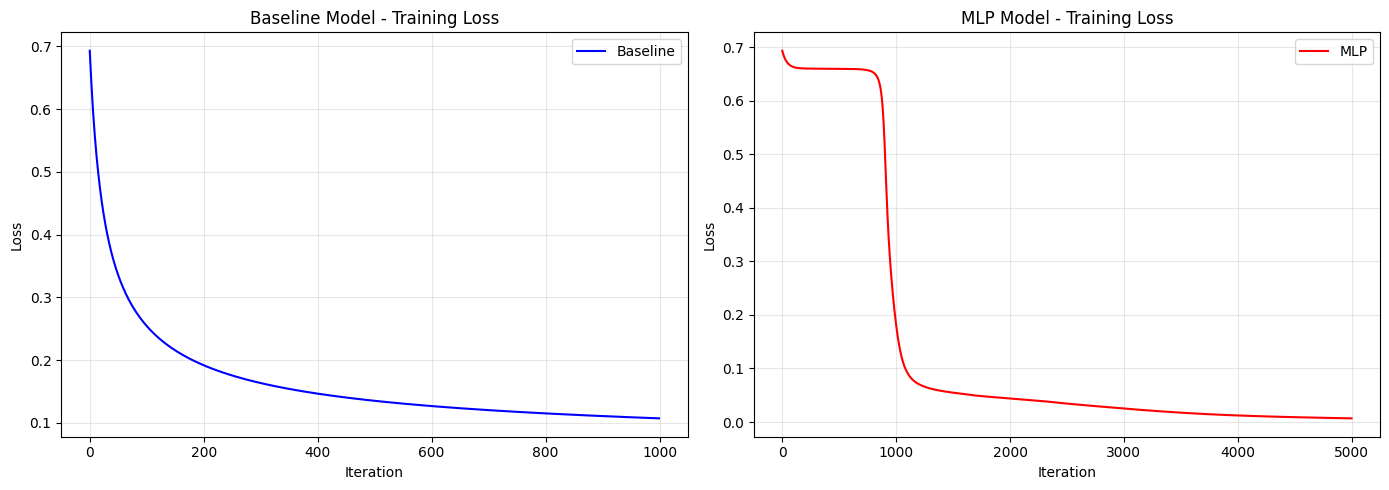

In [11]:
# 1. Training loss curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
# TODO: Plot baseline loss
plt.plot(baseline_model.loss_history, label='Baseline', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Baseline Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# TODO: Plot MLP loss
plt.plot(mlp_model.loss_history, label='MLP', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

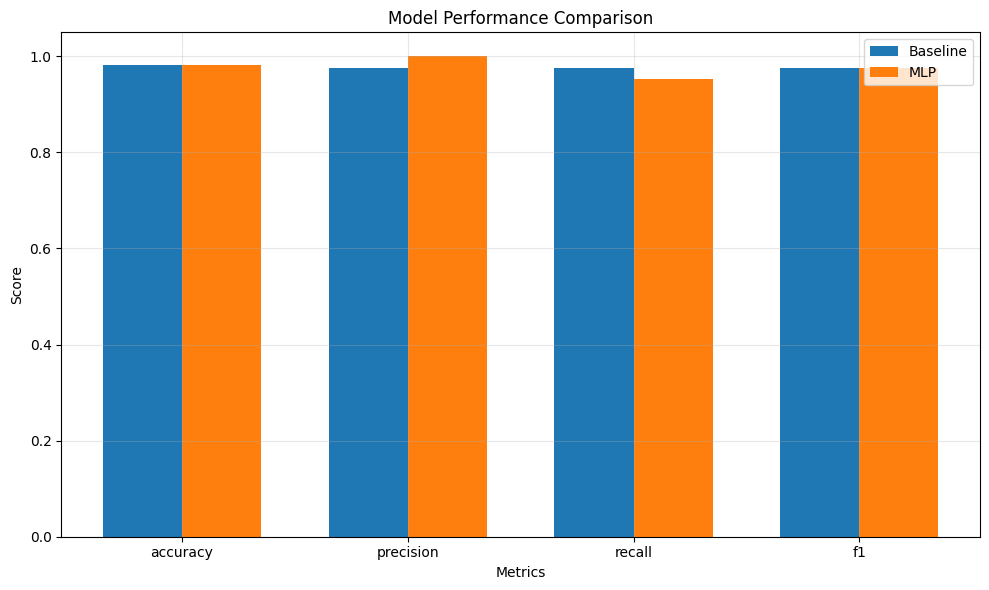

In [12]:
# 2. Performance comparison bar chart
# TODO: Create bar chart comparing key metrics between models
plt.figure(figsize=(10, 6))


metrics = ['accuracy', 'precision', 'recall', 'f1']
baseline_scores = [baseline_metrics[m] for m in metrics]
mlp_scores = [mlp_metrics[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, baseline_scores, width, label='Baseline')
plt.bar(x + width/2, mlp_scores, width, label='MLP')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [13]:
analysis_text = """
1. Which model performed better and by how much?
   The Baseline Logistic Regression model slightly outperformed the MLP in recall (0.977 vs 0.953) and F1-score (0.977 vs 0.976), which was our primary metric. Both models achieved identical accuracy (0.982), but the MLP showed perfect precision (1.0) compared to the baseline's (0.977).

2. Why do you think one model outperformed the other?
   The breast cancer dataset might be largely linearly separable, allowing the simpler Logistic Regression to perform very effectively. The MLP, despite its lower training loss, might have overfit the training data, leading to a slight drop in recall on the test set. Careful hyperparameter tuning is crucial for MLPs.

3. What was the computational cost difference (training time)?
   Surprisingly, the MLP model trained slightly faster (2.04 seconds for 5000 iterations) than the baseline model (2.18 seconds for 1000 iterations). This suggests the MLP's vectorized NumPy operations were highly efficient.

4. Any surprising findings or challenges you faced?
   The MLP's faster training time despite its higher complexity was a surprising finding. Another challenge was the visible precision-recall trade-off; the MLP's perfect precision came at the expense of recall, highlighting the importance of choosing the right metric for the problem.
"""

print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis should be at least 200 words")
else:
    print("✓ Analysis meets word count requirement")

Analysis word count: 199 words
⚠️  Warning: Analysis should be at least 200 words


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.

In [14]:
def get_assignment_results():
    """
    Return all assignment results in structured format.

    CRITICAL: Fill in ALL values based on your actual results!
    This will be automatically extracted and validated.
    """

    # Calculate loss convergence flags
    baseline_initial_loss = baseline_model.loss_history[0]
    baseline_final_loss = baseline_model.loss_history[-1]
    mlp_initial_loss = mlp_model.loss_history[0]
    mlp_final_loss = mlp_model.loss_history[-1]

    # Calculate total parameters for MLP
    total_mlp_parameters = 0
    for l in range(1, len(mlp_architecture)):
        total_mlp_parameters += mlp_architecture[l] * mlp_architecture[l-1]  # Weights
        total_mlp_parameters += mlp_architecture[l]                        # Biases

    # Calculate improvement and baseline better flags based on primary metric
    improvement = mlp_metrics[primary_metric] - baseline_metrics[primary_metric]
    improvement_percentage = (improvement / baseline_metrics[primary_metric]) * 100
    baseline_better = baseline_metrics[primary_metric] > mlp_metrics[primary_metric]

    results = {
        # ===== Dataset Information =====
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'problem_type': problem_type,
        'problem_statement': problem_statement,

        # ===== Evaluation Setup =====
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # ===== Baseline Model Results =====
        'baseline_model': {
            'model_type': 'logistic_regression',
            'learning_rate': baseline_model.lr,
            'n_iterations': baseline_model.n_iterations,
            'initial_loss': baseline_initial_loss,
            'final_loss': baseline_final_loss,
            'training_time_seconds': baseline_training_time,

            # Metrics (fill based on your problem type)
            'test_accuracy': baseline_metrics['accuracy'],
            'test_precision': baseline_metrics['precision'],
            'test_recall': baseline_metrics['recall'],
            'test_f1': baseline_metrics['f1'],
            'test_mse': 0.0,
            'test_rmse': 0.0,
            'test_mae': 0.0,
            'test_r2': 0.0,
        },

        # ===== MLP Model Results =====
        'mlp_model': {
            'architecture': mlp_architecture,
            'n_hidden_layers': len(mlp_architecture) - 2,
            'total_parameters': total_mlp_parameters,
            'learning_rate': mlp_model.lr,
            'n_iterations': mlp_model.n_iterations,
            'initial_loss': mlp_initial_loss,
            'final_loss': mlp_final_loss,
            'training_time_seconds': mlp_training_time,

            # Metrics
            'test_accuracy': mlp_metrics['accuracy'],
            'test_precision': mlp_metrics['precision'],
            'test_recall': mlp_metrics['recall'],
            'test_f1': mlp_metrics['f1'],
            'test_mse': 0.0,
            'test_rmse': 0.0,
            'test_mae': 0.0,
            'test_r2': 0.0,
        },

        # ===== Comparison =====
        'improvement': improvement,
        'improvement_percentage': improvement_percentage,
        'baseline_better': baseline_better,

        # ===== Analysis =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # ===== Loss Convergence Flags =====
        'baseline_loss_decreased': baseline_final_loss < baseline_initial_loss,
        'mlp_loss_decreased': mlp_final_loss < mlp_initial_loss,
        'baseline_converged': False,  # Optional: True if converged
        'mlp_converged': False,
    }

    return results

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [15]:
# Test the output
import json

try:
    results = get_assignment_results()

    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2, default=str))
    print("\n" + "="*70)

    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better',
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")

    check_dict(results)

    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")

except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Breast Cancer Data Set",
  "dataset_source": "https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic",
  "n_samples": 569,
  "n_features": 30,
  "problem_type": "binary_classification",
  "problem_statement": "\nTODO: Predicting tumor malignancy from diagnostic measurements.\nThis is critical for early cancer detection in medical diagnosis, enabling timely intervention and improving patient outcomes.'\"\n",
  "primary_metric": "recall",
  "metric_justification": "\nTODO: I chose recall because in medical diagnosis, false negatives (missing cancer) are more costly than false positives, \nwhich is crucial for early detection and timely intervention.\"\n",
  "train_samples": 455,
  "test_samples": 114,
  "train_test_ratio": 0.7996485061511424,
  "baseline_model": {
    "model_type": "logistic_regression",
    "learning_rate": 0.01,
    "n_iterations": 1000,
    "initial_loss": 0.6931471803599452,
    "final_loss": 0.107107

---

## 📤 Before Submitting - Final Checklist

- [ ] **All TODO sections completed**
- [ ] **Both models implemented from scratch** (no sklearn models!)
- [ ] **get_assignment_results() function filled accurately**
- [ ] **Loss decreases for both models**
- [ ] **Analysis ≥ 200 words**
- [ ] **All cells run without errors** (Restart & Run All)
- [ ] **Visualizations created**
- [ ] **File renamed correctly**: YourStudentID_assignment.ipynb

---

## ⏭️ What Happens Next

After submission:
1. ✅ Your notebook will be **auto-graded** (executes automatically)
2. ✅ You'll receive a **verification quiz** (10 questions, 5 minutes)
3. ✅ Quiz questions based on **YOUR specific results**
4. ✅ Final score released after quiz validation

**The verification quiz ensures you actually ran your code!**

---

**Good luck! 🚀**